# 資料處理階段

In [2]:
import pandas as pd

real_estate = pd.read_csv("/Users/araschang/Desktop/coding/USA real estate pricing model/realtor-data.csv")
print(real_estate.head())
for i in range(real_estate.shape[0]):
    if real_estate["pricepersize"][i] == '#DIV/0!':
        real_estate = real_estate.drop(i)
    if i % 10000 == 0:
        print('-', end='')
print(real_estate.head())

    price  bed  bath        state  house_size pricepersize
0  105000  3.0   2.0  Puerto Rico       920.0  114.1304348
1   80000  4.0   2.0  Puerto Rico      1527.0  52.39030779
2   67000  2.0   1.0  Puerto Rico       748.0  89.57219251
3  145000  4.0   2.0  Puerto Rico      1800.0  80.55555556
4   65000  6.0   2.0  Puerto Rico         NaN      #DIV/0!
---------------------    price  bed  bath        state  house_size pricepersize
0  105000  3.0   2.0  Puerto Rico       920.0  114.1304348
1   80000  4.0   2.0  Puerto Rico      1527.0  52.39030779
2   67000  2.0   1.0  Puerto Rico       748.0  89.57219251
3  145000  4.0   2.0  Puerto Rico      1800.0  80.55555556
5  179000  4.0   3.0  Puerto Rico      2520.0  71.03174603


In [28]:
import pandas as pd
real_estate["pricepersize"] = real_estate["pricepersize"].astype(int, errors='raise')
real_estate = real_estate.dropna(how='any')
real_estate.to_csv("real_estate.csv")

# 迴歸模型

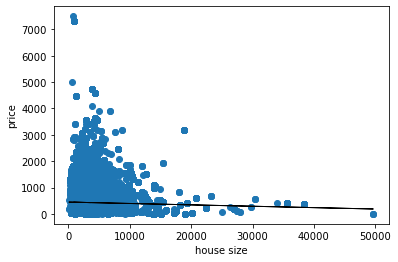

Coefficient:  [[-0.00525381]]
Intercept:  [451.46523562]
R:  0.0238903100367027
R square:  0.0005707469136497778
Adjust R square:  0.0005648841613159483


In [137]:
# 單迴歸模型（x：house_size, y：price）
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

real_estate = pd.read_csv("/Users/araschang/Desktop/coding/PycharmProjects/learning/machine learning/USA real estate pricing model/real_estate.csv")

lm = LinearRegression()
price = real_estate["pricepersize"].values.reshape(-1, 1)
bed = real_estate['bed'].values.reshape(-1, 1)
house_size = real_estate['house_size'].values.reshape(-1, 1)

lm.fit(house_size, price)

plt.scatter(house_size, price)
plt.plot(house_size, lm.predict(house_size), color='black', linewidth=1)
plt.xlabel('house size')
plt.ylabel('price')
plt.show()

print("Coefficient: ", lm.coef_)
print("Intercept: ", lm.intercept_)
print("R: ", lm.score(house_size, price) ** (1/2))
print("R square: ", lm.score(house_size, price))
print("Adjust R square: ", 1 - ((real_estate.shape[0]-1) /(real_estate.shape[0]-2))*(1-lm.score(house_size, price)))

In [135]:
# 複迴歸模型（x：house_size, bed, y：price）
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

real_estate = pd.read_csv("/Users/araschang/Desktop/coding/PycharmProjects/learning/machine learning/USA real estate pricing model/real_estate.csv")
lm = LinearRegression()
price = real_estate["pricepersize"].values.reshape(-1, 1)
bed = real_estate['bed'].values.reshape(-1, 1)
bath = real_estate['bath'].values.reshape(-1, 1)
house_size = real_estate['house_size'].values.reshape(-1, 1)
x_temp = np.hstack((house_size, bed))

lm.fit(x_temp, price)

print("Coefficient: ", lm.coef_)
print("Intercept: ", lm.intercept_)
print("R: ", lm.score(x_temp, price) ** (1/2))
print("R square: ", lm.score(x_temp, price))
print("Adjust R square: ", 1 - ((real_estate.shape[0]-1) /(real_estate.shape[0]-3))*(1-lm.score(x_temp, price)))

Coefficient:  [[ 2.55126765e-02 -3.12153886e+01]]
Intercept:  [493.90934229]
R:  0.15716287906289278
R square:  0.024700170555337464
Adjust R square:  0.024688728074790167


In [133]:
# 複回歸（x：house_size, bed, bath, 州別, y：price）
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

real_estate = pd.read_csv("/Users/araschang/Desktop/coding/PycharmProjects/learning/machine learning/USA real estate pricing model/real_estate.csv")
lm = LinearRegression()
price = real_estate["pricepersize"].values.reshape(-1, 1)
bed = real_estate['bed'].values.reshape(-1, 1)
bath = real_estate['bath'].values.reshape(-1, 1)
house_size = real_estate['house_size'].values.reshape(-1, 1)
stateFactor = pd.get_dummies(real_estate['state'])
x_temp = np.hstack((stateFactor, house_size, bed, bath))
lm.fit(x_temp, price)

predict_y = lm.predict(x_temp)
print("Coefficient: ", lm.coef_)
print("Intercept: ", lm.intercept_)
print("R: ", lm.score(x_temp, price) ** (1/2))
print("R square: ", lm.score(x_temp, price))
print("Adjust R square: ", 1 - ((real_estate.shape[0]-1) /(real_estate.shape[0]-13))*(1-lm.score(x_temp, price)))

Coefficient:  [[-6.72685335e+01  2.49121378e+02 -1.93525636e+01 -8.15313200e+01
   1.73459846e+01 -5.98413001e+01 -1.52764044e+01 -7.03573562e+01
   4.71601148e+01  7.26614648e-03 -5.53934483e+01  3.96030683e+01]]
Intercept:  [340.00324032]
R:  0.41158319861137077
R square:  0.16940072937916706
Adjust R square:  0.16934225706162953


In [1]:
# 複迴歸模型（x:大雜燴, y：price）
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

real_estate = pd.read_csv("/Users/araschang/Desktop/coding/PycharmProjects/learning/machine learning/USA real estate pricing model/real_estate.csv")
lm = LinearRegression()
price = real_estate["pricepersize"].values.reshape(-1, 1)
bed = real_estate['bed'].values.reshape(-1, 1)
bath = real_estate['bath'].values.reshape(-1, 1)
house_size = real_estate['house_size'].values.reshape(-1, 1)
stateFactor = pd.get_dummies(real_estate['state'])
x_temp = np.hstack((stateFactor, house_size, bed, bath, bed*bath, house_size*bed, house_size*bath, \
                    house_size*stateFactor, bed*stateFactor, bath*stateFactor, house_size*bath*bed))

lm.fit(x_temp, price)

predict_y = lm.predict(x_temp)
print("Coefficient: ", lm.coef_)
print("Intercept: ", lm.intercept_)
print("R: ", lm.score(x_temp, price) ** (1/2))
print("R square: ", lm.score(x_temp, price))
print("Adjust R square: ", 1 - ((real_estate.shape[0]-1) /(real_estate.shape[0]-20))*(1-lm.score(x_temp, price)))

Coefficient:  [[-5.60641328e+06 -5.60602653e+06 -5.60638227e+06 -2.24015937e+00
  -5.60620242e+06 -5.60643700e+06 -5.60629278e+06 -5.60637344e+06
  -5.60633925e+06 -3.73783855e+02 -7.48947269e+01  7.05651468e+01
   9.59242896e-01  1.04318555e-02 -5.69677551e-03  3.73808638e+02
   3.73699661e+02  3.73740262e+02 -3.36383093e+03  3.73763299e+02
   3.73784469e+02  3.73716411e+02  3.73783237e+02  3.73751915e+02
   1.34396099e+01 -3.95469157e+01  3.09899554e+01 -6.72766185e+00
  -5.20099357e+01 -1.80490070e+01  1.83887545e+01 -2.48212534e+00
  -1.88966563e+01 -5.17960770e+01  7.87087346e+01 -6.12197577e+00
  -6.72766185e+00  2.58776260e+01  3.02558167e+01 -1.36735114e+01
  -3.32738853e+01  4.73167084e+01 -1.22185315e-04]]
Intercept:  [5606670.20421956]
R:  0.48302295654819905
R square:  0.2333111765525634
Adjust R square:  0.23322571553019655


# 預測模型用戶輸入

In [144]:
Connecticut = 0
Massachusetts = 0
New_Hampshire = 0
New_Jersey = 0
New_York = 0
Puerto_Rico = 0
Rhode_Island = 0
Vermont = 0
Virgin_Islands = 0

state = input("Which state do you want to buy: ")
house_size = int(input("How big is your house: "))
bed = int(input("How many bedrooms do you have: "))
bath = int(input("How many bathrooms do you have: "))

if state == "Connecticut":
    Connecticut = 1
elif state == "Massachusetts":
    Massachusetts = 1
elif state == "New Hampshire":
    New_Hampshire = 1
elif state == "New Jersey": 
    New_Jersey = 1
elif state == "New York":
    New_York = 1
elif state == "Puerto Rico":
    Puerto_Rico = 1
elif state == "Rhode Island":
    Rhode_Island = 1
elif state == "Vermont":
    Vermont = 1
elif state == "Virgin Islands":
    Virgin_Islands = 1

predict_price = -5.60641328e+06*Connecticut - 5.60602653e+06*Massachusetts - 5.60638227e+06*New_Hampshire - \
                2.24015937e+00*New_Jersey - 5.60620242e+06*New_York - 5.60643700e+06*Puerto_Rico - \
                5.60629278e+06*Rhode_Island - 5.60637344e+06*Vermont - 5.60633925e+06*Virgin_Islands - 3.73783855e+02*house_size - 7.48947269e+01*bed + 7.05651468e+01*bath + 9.59242896e-01*bed*bath + 1.04318555e-02*house_size*bed - 5.69677551e-03*house_size*bath + 3.73808638e+02*house_size*Connecticut + 3.73699661e+02*house_size*Massachusetts + 3.73740262e+02*house_size*New_Hampshire - 3.36383093e+03*house_size*New_Jersey + 3.73763299e+02*house_size*New_York + 3.73784469e+02*house_size*Puerto_Rico + 3.73716411e+02*house_size*Rhode_Island + 3.73783237e+02*house_size*Vermont + 3.73751915e+02*house_size*Virgin_Islands + 1.34396099e+01*bed*Connecticut - 3.95469157e+01*bed*Massachusetts + 3.09899554e+01*bed*New_Hampshire - 6.72766185e+00*bed*New_Jersey - 5.20099357e+01*bed*New_York - 1.80490070e+01*bed*Puerto_Rico + 1.83887545e+01*bed*Rhode_Island - 2.48212534e+00*bed*Vermont - 1.88966563e+01*bed*Virgin_Islands - 5.17960770e+01*bath*Connecticut + 7.87087346e+01*bath*Massachusetts - 6.12197577e+00*bath*New_Hampshire - 6.72766185e+00*bath*New_Jersey + 2.58776260e+01*bath*New_York + 3.02558167e+01*bath*Puerto_Rico - 1.36735114e+01*bath*Rhode_Island - 3.32738853e+01*bath*Vermont + 4.73167084e+01*bath*Virgin_Islands - 1.22185315e-04*house_size*bath*bed + 5606670.20421956

print("Your house is valued at $" + str(house_size * int(predict_price)) + '.')


Which state do you want to buy: Puerto Rico
How big is your house: 500
How many bedrooms do you have: 3
How many bathrooms do you have: 4
Your house is valued at $186000.
